<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/SigmoidNeuron/SigmoidNeuronCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1+\exp{-(wx+b)}} $

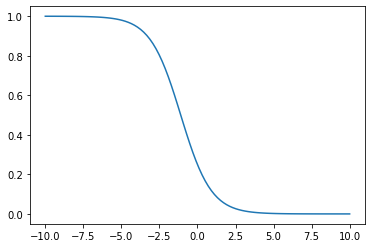

In [2]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

w = -1 #@param {type: "slider", min: -2, max: 2, step:0.1}
b = -1.1  #@param {type: "slider", min: -2, max: 2, step :0.1}
x = np.linspace(-10,10,100)
y = sigmoid(x,w,b)

plt.plot(x,y)

#3D

$S_{w_1,w_2,b}(x) = \frac{1}{1+\exp{-(w_1x_1+w_2x_2+b)}} $

In [3]:
from mpl_toolkits import mplot3d

X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,80)


In [4]:
XX1, XX2 = np.meshgrid(X1, X2)

In [5]:
def sigmoid2D(xx1,xx2,w1,w2,b):
  return 1/(1+np.exp(-(w1*xx1+w2*xx2+b)))

w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid2D(XX1,XX2,w1,w2,b)

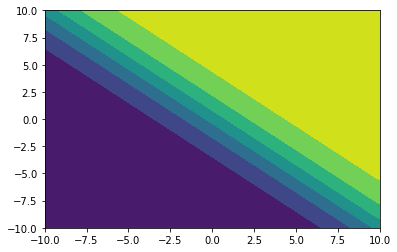

In [6]:
plt.contourf(XX1,XX2,Y)
plt.show()

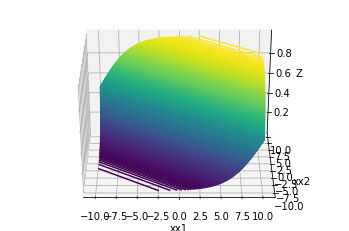

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1,XX2,Y,500,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('Z')

ax.view_init(30,270)

# Compute loss for given data

In [8]:
w_unkown = 0.5
b_unkown = 0.25

X = np.random.random(25) * 25 - 10
Y = sigmoid(X,w_unkown,b_unkown)


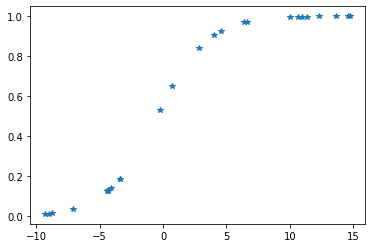

In [9]:
plt.plot(X,Y,'*')
plt.show()

In [10]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_est,b_est))**2
  return loss
  

In [11]:
# for given fixed range
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)



In [12]:
WW.shape

(101, 101)

In [13]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])
    

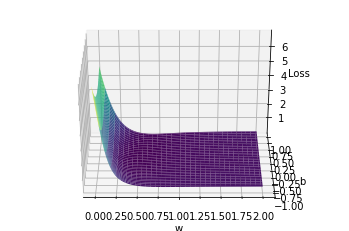

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30,270)

In [15]:
ij = np.argmin(Loss)
i = int(np.floor(ij)/Loss.shape[1])
j = int(ij - i * Loss.shape[1])

In [16]:
print(i,j)

62 25


# Class for sigmoid neuron

In [17]:
class SigmoidNeuron():

  def __init(self):
    self.w = None
    self.b = None
    pass
  
  def perceptron(self,x):
    ans = np.dot(x,self.w.T) + self.b
    return ans

  def  sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred)

  def fit(self,X,Y,epoch=1,learning_rate=1,initialise = True,display_loss = False):
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0

    if display_loss:
      loss = []

    for i in tqdm_notebook(range(epoch),total=epoch,unit='epoch'):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db  

      if display_loss:
        y_pred = self.sigmoid(self.perceptron(x))
        loss.append(mean_squared_error(y_pred,y))

    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
  def predict(self,X):
    y_pred = []
    for i in X:
      ypred = self.sigmoid(self.perceptron(i))
      y_pred.append(ypred)
    return np.array(y_pred)


# Toy data

In [18]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4],[-3,1.25],[2,4],[1,5]])
Y = [1,1,1,0,0,0]


In [19]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,initialise = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [20]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1,XX2,YY,cmap='viridis',alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap='viridis')
    ax.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 0.188613  -0.1861269]] [-0.00063559]



[[ 0.32030852 -0.38731068]] [9.81570938e-05]



[[ 0.41634482 -0.42068058]] [0.0150792]



[[ 0.48407494 -0.45165089]] [0.02567085]



[[ 0.53799012 -0.4795633 ]] [0.03434574]


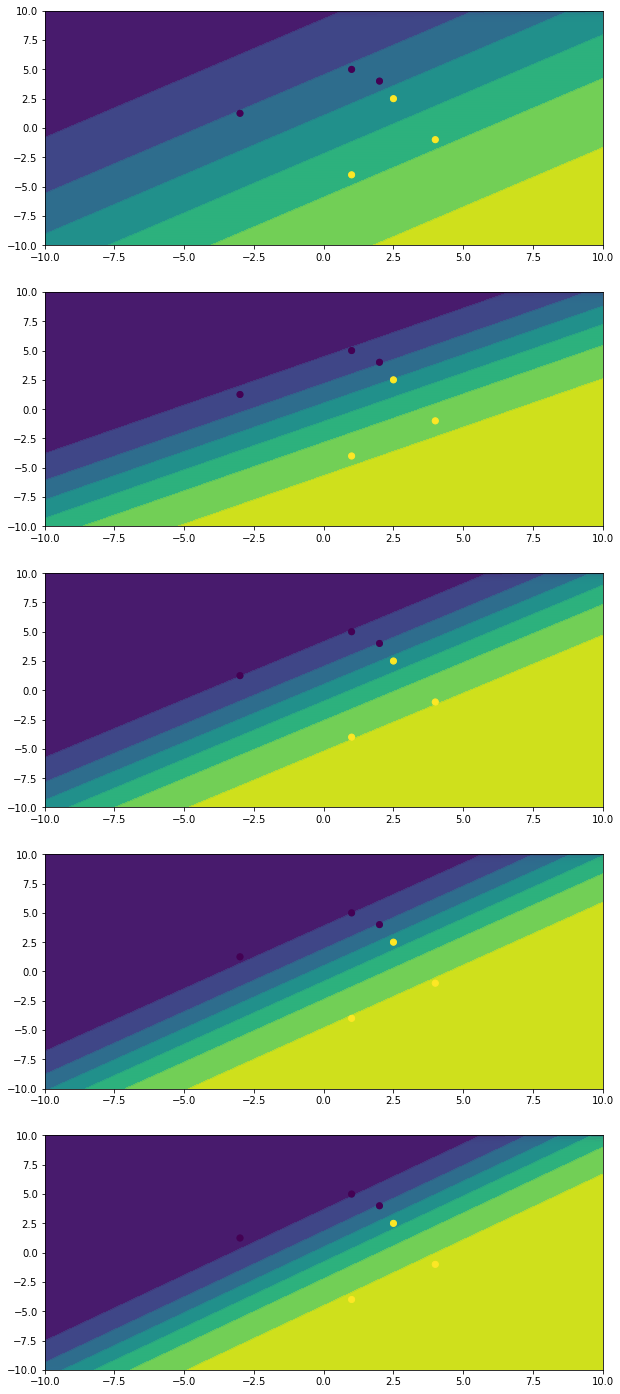

In [21]:
sn.fit(X,Y,1,0.05,True)
N = 5
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.25,False)

In [22]:
!wget https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV

--2020-08-11 21:26:45--  https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.138, 74.125.203.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV/view?usp=drive_open [following]
--2020-08-11 21:26:45--  https://drive.google.com/file/d/1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV.2’

open?id=1rtwC_k4WA8     [ <=>                ]  70.09K  --.-KB/s    in 0.1s    

2020-08-11 21:26:46 (593 KB/s) - ‘open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV.2’ saved [71774]



In [23]:
!ls


 mobile_cleaned.csv
'open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV'
'open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV.1'
'open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV.2'
 sample_data


In [24]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pragneshrana/DeepLearning/master/SigmoidNeuron/mobile_cleaned.csv'
data = pd.read_csv(url, error_bad_lines=False)


In [25]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [26]:
data.shape

(341, 88)

In [27]:
X = data.drop('Rating',axis=1)
Y = data['Rating']

# Binarize the output

In [28]:
thresold = 4.2
data['Class'] = (data['Rating'] >= thresold).astype(np.int)

In [29]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [30]:
Y_binarized = data['Class'].values

# Standardisation

Data with varies range affect the result or more work is required. so to simplify..

Properties:
- Mean = 0
- Standrad Deviation = 1



In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
R = np.random.random([100,1])

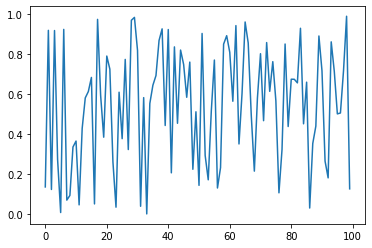

In [33]:
plt.plot(R)
plt.show()

In [34]:
np.mean(R)


0.5446333867457261

In [35]:
np.std(R)

0.2920090176037424

In [36]:
scaler = StandardScaler()


In [37]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaler.mean_

array([0.54463339])

In [39]:
RT = scaler.transform(R)

In [40]:
np.mean(RT)

5.329070518200751e-17

In [41]:
np.std(RT)

1.0

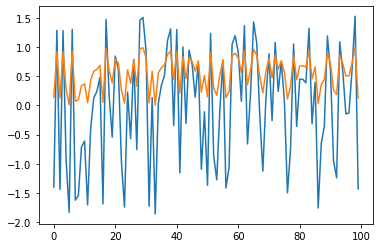

In [42]:
plt.plot(RT)
plt.plot(R)
plt.show()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0, stratify=Y_binarized)

In [44]:
print(x_train.shape,x_test.shape)

(255, 87) (86, 87)


In [45]:
scaler = StandardScaler()


In [46]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [48]:
y_train = np.array(y_train).reshape(-1, 1)
Y_scaled_train = minmax_scaler.fit_transform(y_train)

In [49]:
np.min(Y_scaled_train)

0.0

In [50]:
y_test = np.array(y_test).reshape(-1, 1)
Y_scaled_test = minmax_scaler.transform(y_test)

In [51]:
scaled_thresold = minmax_scaler.transform(np.array(thresold).reshape(-1,1))[0][0]

In [52]:
scaled_thresold

0.6800000000000002

In [53]:
y_binarised_train = (Y_scaled_train > scaled_thresold).astype("int").ravel()

In [54]:
y_binarised_test = (Y_scaled_test > scaled_thresold).astype("int").ravel()

# Train Data

In [55]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


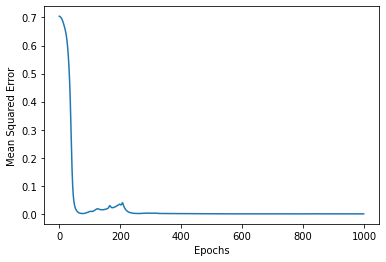

In [56]:
sn.fit(x_scaled_train,Y_scaled_train,epoch=1000,learning_rate=0.015,display_loss = True)

In [57]:
Y_pred_train = sn.predict(x_scaled_train)
Y_pred_test = sn.predict(x_scaled_test)

In [58]:
y_pred_binarised_train = (Y_pred_train > scaled_thresold).astype("int").ravel()

In [59]:
y_pred_binarised_test = (Y_pred_test > scaled_thresold).astype("int").ravel()

In [60]:
accuracy_train = accuracy_score(y_pred_binarised_train,y_binarised_train)
accuracy_test = accuracy_score(y_pred_binarised_test,y_binarised_test)
print(accuracy_train,accuracy_test)

0.8117647058823529 0.8488372093023255


# Video

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


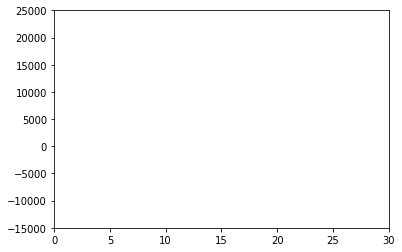

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, weight_matrix.shape[1]))
ax.set_ylim((-15000,25000))
line, = ax.plot([], [], lw=2)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(weight_matrix.shape[1]))
    y = weight_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=50, interval=50, blit=True)

In [ ]:
HTML(anim.to_html5_video())
